In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

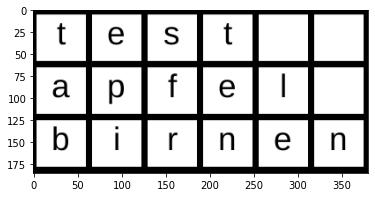

In [249]:
image  = cv2.imread("testBild.jpg")
plt.imshow(image)
plt.show()

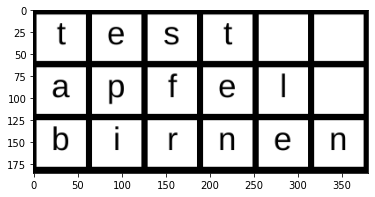

In [250]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

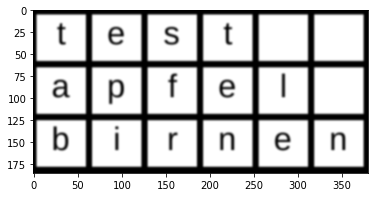

In [251]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blur, cmap='gray')
plt.show()

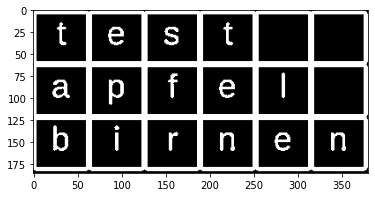

In [252]:
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
plt.imshow(thresh, cmap='gray')
plt.show()

In [253]:
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
c = 0

for i in contours:
        area = cv2.contourArea(i)
        if area > 1000:
                if area > max_area:
                    max_area = area
                    best_cnt = i
                    image = cv2.drawContours(image, contours, c, (0, 255, 0), 3)
        c+=1

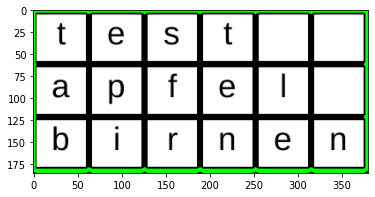

In [254]:
plt.imshow(image, cmap='gray')
plt.show()

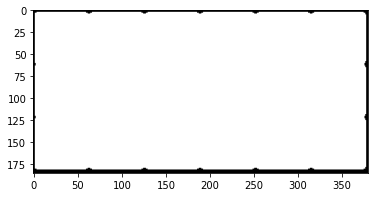

In [255]:
mask = np.zeros((gray.shape),np.uint8)
cv2.drawContours(mask,[best_cnt],0,255,-1)
cv2.drawContours(mask,[best_cnt],0,0,2)

plt.imshow(mask, cmap='gray')
plt.show()

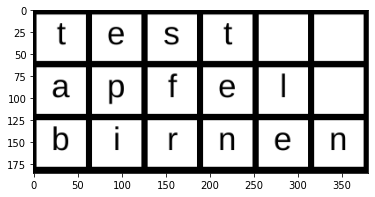

In [256]:
out = np.zeros_like(gray)
out[mask == 255] = gray[mask == 255]

plt.imshow(out, cmap='gray')
plt.show()

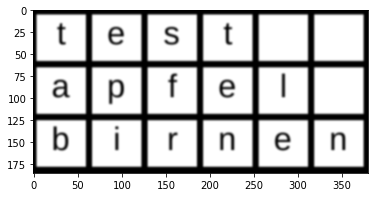

In [257]:
blur = cv2.GaussianBlur(out, (5,5), 0)
plt.imshow(blur, cmap='gray')
plt.show()

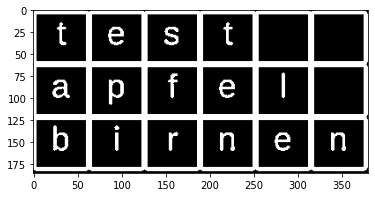

In [258]:
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
plt.imshow(thresh, cmap='gray')
plt.show()

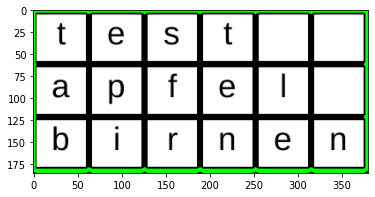

In [259]:
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

c = 0
for i in contours:
        area = cv2.contourArea(i)
        #print(area)
        #print(i)
        if area > 1000/2:
            cv2.drawContours(image, contours, c, (0, 255, 0), 3)
        c+=1
        break
        
plt.imshow(image, cmap='gray')
plt.show()

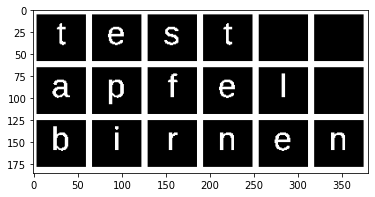

41


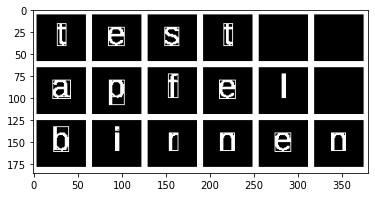

In [49]:
image  = cv2.imread("testBild.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, 1, 1, 61, 20)

plt.imshow(thresh, cmap='gray')
plt.show()

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]
#print(cnt)
i = 0
rects = []
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    rects.append((x,y,w,h))
    cv2.rectangle(thresh,(x,y),(x+w,y+h),(255,255,255),1)
    #print(x,y,w,h)
    i += 1
rects.reverse()
print(i)
plt.imshow(thresh, cmap='gray')
plt.show()

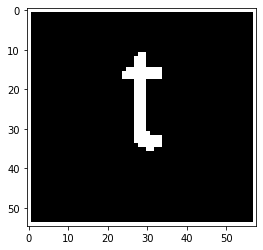

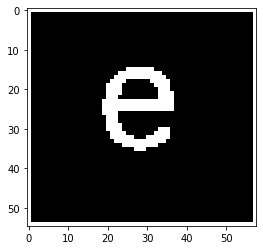

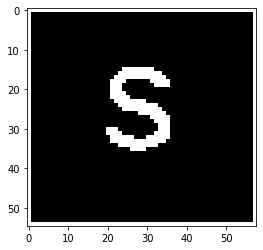

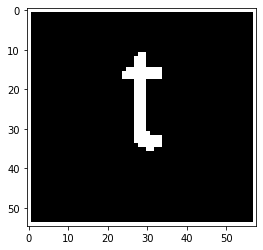

In [52]:
import math

words = []
letters = []

inverted = cv2.adaptiveThreshold(gray, 255, 1, 1, 61, 20)

alt_y = -1

for r in rects:
    x,y,w,h = r
    if (w >= 56 and w <= 60) and (h >= 53 and h <= 67):
        #jump to next word
        if y > alt_y and alt_y != -1:
            words.append(letters)
            letters = []
            
        #get single letter from big image
        crop_img = inverted[y:y+h, x:x+w]

        #only take letters which are not blank
        if crop_img.sum() > 56610:
            letters.append(crop_img)
            alt_y = y

words.append(letters)            
            
for w in words:
    for letter in w:
        plt.imshow(letter, cmap='gray')
        plt.show()
    break

In [ ]:

cv2.resize(imageArray, dsize=(28,28), interpolation=cv2.INTER_CUBIC)